# Human Connectome Project (HCP) Dataset loader

The HCP dataset comprises resting-state and task-based fMRI from a large sample of human subjects. The NMA-curated dataset includes time series data that has been preprocessed and spatially-downsampled by aggregating within 360 regions of interest.

In [ ]:
# install pingouin as !pip install pingouin
!pip install pingouin
#from statsmodels.stats.anova import AnovaRM

     |████████████████████████████████| 215kB 5.2MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.12-cp37-none-any.whl size=204754 sha256=b061b63c8b6a6fa53bcc1a9924d9a370beeae38d1a25b927c3b5ffdb66e39632
  Stored in directory: /root/.cache/pip/wheels/d6/36/7e/ae23fc9845091efd9228b36f93b306a67c40bdc2195b280748
  Created wheel for littleutils: filename=littleutils-0.2.2-cp37-none-any.whl size=7050 sha256=6098d3ffb80f9497b36bae5c20c5c6254f5a375804d079a436cff89cf877d952
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin littleutils


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pylab as P
import seaborn as sns
import pandas as pd
import pingouin as pg

from collections import namedtuple

In [ ]:
# Necessary for visualization
!pip install nilearn --quiet
from nilearn import plotting, datasets

     |████████████████████████████████| 4.9MB 5.3MB/s 


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/__init__.py:89: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [ ]:
#@title Figure settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

# Basic parameters

In [ ]:
# The download cells will store the data in nested directories starting here:
HCP_DIR = "./hcp"
if not os.path.isdir(HCP_DIR):
  os.mkdir(HCP_DIR)

# The data shared for NMA projects is a subset of the full HCP dataset
N_SUBJECTS = 339

# The data have already been aggregated into ROIs from the Glasesr parcellation
N_PARCELS = 360

# The acquisition parameters for all tasks were identical
TR = 0.72  # Time resolution, in sec

# The parcels are matched across hemispheres with the same order
HEMIS = ["Right", "Left"]

# Each experiment was repeated multiple times in each subject
N_RUNS_REST = 4
N_RUNS_TASK = 2

# Time series data are organized by experiment, with each experiment
# having an LR and RL (phase-encode direction) acquistion
BOLD_NAMES = [
  "rfMRI_REST1_LR", "rfMRI_REST1_RL",
  "rfMRI_REST2_LR", "rfMRI_REST2_RL",
  "tfMRI_GAMBLING_RL", "tfMRI_GAMBLING_LR",
]

# You may want to limit the subjects used during code development.
# This will use all subjects:
subjects = range(N_SUBJECTS)

# Downloading data

The rest and task data are shared in different files, but they will unpack into the same directory structure.

Each file is fairly large and will take some time to download. If you are focusing only on rest or task analyses, you may not want to download only that dataset.

We also separately provide some potentially useful behavioral covariate information.

In [ ]:
fname = "hcp_rest.tgz"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/bqp7m/download/
  !tar -xzf $fname -C $HCP_DIR --strip-components=1

In [ ]:
fname = "hcp_covariates.tgz"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/x5p4g/download/
  !tar -xzf $fname -C $HCP_DIR --strip-components=1


## Step 1. load the behavior data

In [ ]:
#load behavior data as pandas dataframes
Gamblingbehavior = pd.read_csv ('hcp/behavior/gambling.csv')

FileNotFoundError: ignored

## Step 2. Descriptive result



> Ploting histograms


Based on the figures, we could see the median reaction time is not normal distributed, and most subjects showed no preference to choosing either larger or smaller. 




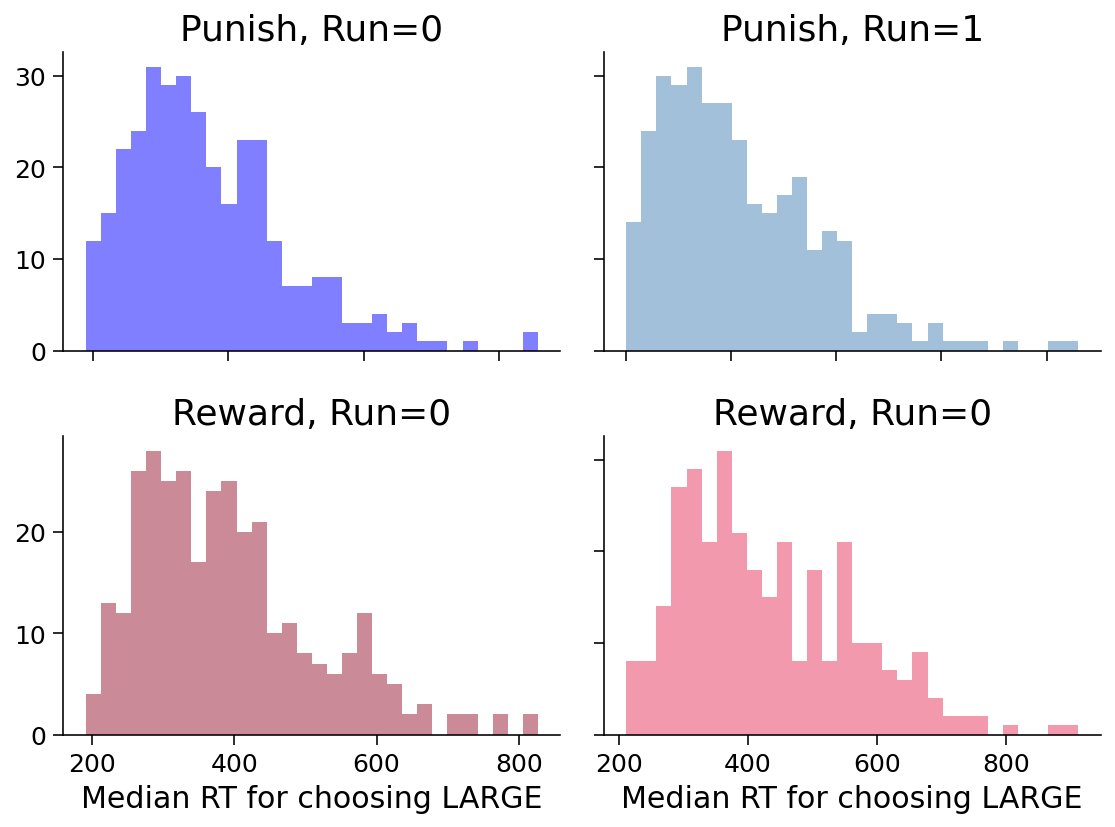

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

fig.suptitle('')
y =Gamblingbehavior.MEDIAN_RT_LARGER[(Gamblingbehavior.Run==0) & (Gamblingbehavior.ConditionName=='PUNISH')].dropna()
ax1.hist(y,bins=30, alpha=0.5, histtype='stepfilled', color='blue', edgecolor='none')
y =Gamblingbehavior.MEDIAN_RT_LARGER[(Gamblingbehavior.Run==1) & (Gamblingbehavior.ConditionName=='PUNISH')].dropna()
ax2.hist(y,bins=30, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')
y =Gamblingbehavior.MEDIAN_RT_LARGER[(Gamblingbehavior.Run==0) & (Gamblingbehavior.ConditionName=='REWARD')].dropna()
ax3.hist(y,bins=30, alpha=0.5, histtype='stepfilled', color='#991731', edgecolor='none')
y =Gamblingbehavior.MEDIAN_RT_LARGER[(Gamblingbehavior.Run==1) & (Gamblingbehavior.ConditionName=='REWARD')].dropna()
ax4.hist(y,bins=30, alpha=0.5, histtype='stepfilled', color='#E6355E', edgecolor='none')


ax1.set_title("Punish, Run=0")
ax2.set_title("Punish, Run=1")
ax3.set_title("Reward, Run=0")
ax4.set_title("Reward, Run=0")
ax3.set_xlabel("Median RT for choosing LARGE")
ax4.set_xlabel("Median RT for choosing LARGE")

for ax in fig.get_axes():
    ax.label_outer()

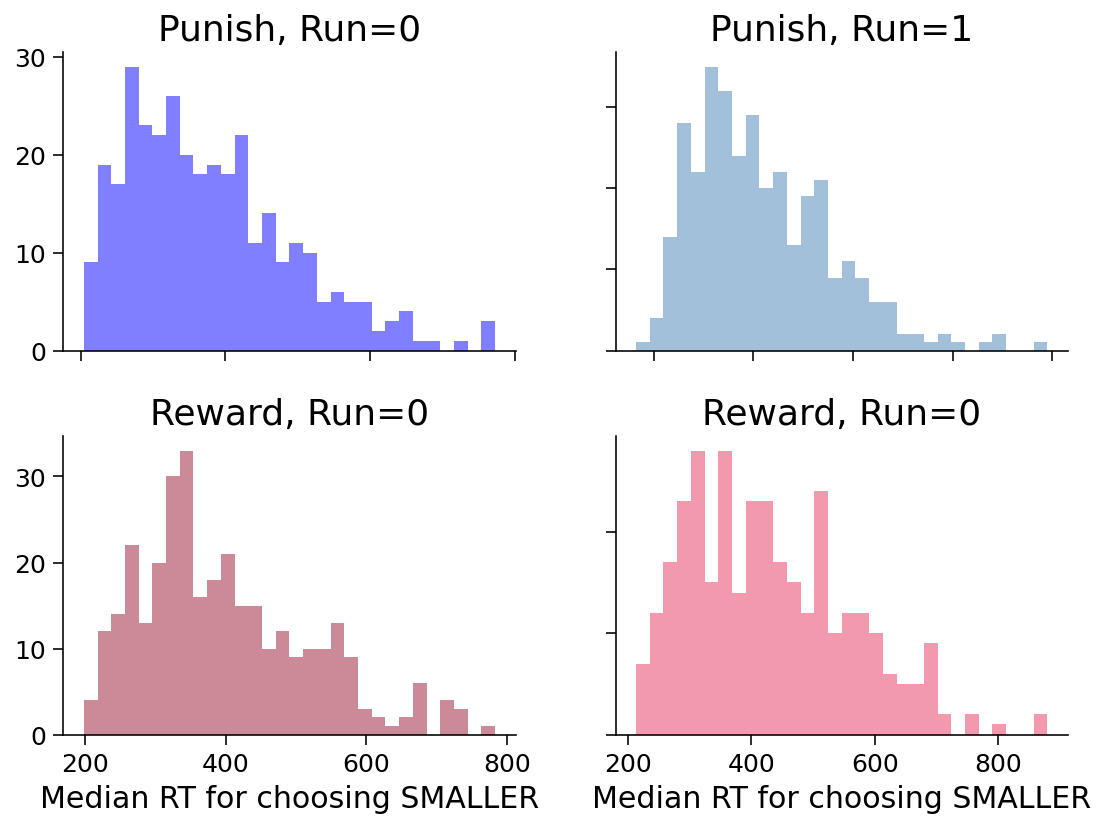

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

fig.suptitle('')
y =Gamblingbehavior.MEDIAN_RT_SMALLER[(Gamblingbehavior.Run==0) & (Gamblingbehavior.ConditionName=='PUNISH')].dropna()
ax1.hist(y,bins=30, alpha=0.5, histtype='stepfilled', color='blue', edgecolor='none')
y =Gamblingbehavior.MEDIAN_RT_SMALLER[(Gamblingbehavior.Run==1) & (Gamblingbehavior.ConditionName=='PUNISH')].dropna()
ax2.hist(y,bins=30, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')
y =Gamblingbehavior.MEDIAN_RT_SMALLER[(Gamblingbehavior.Run==0) & (Gamblingbehavior.ConditionName=='REWARD')].dropna()
ax3.hist(y,bins=30, alpha=0.5, histtype='stepfilled', color='#991731', edgecolor='none')
y =Gamblingbehavior.MEDIAN_RT_SMALLER[(Gamblingbehavior.Run==1) & (Gamblingbehavior.ConditionName=='REWARD')].dropna()
ax4.hist(y,bins=30, alpha=0.5, histtype='stepfilled', color='#E6355E', edgecolor='none')


ax1.set_title("Punish, Run=0")
ax2.set_title("Punish, Run=1")
ax3.set_title("Reward, Run=0")
ax4.set_title("Reward, Run=0")
ax3.set_xlabel("Median RT for choosing SMALLER")
ax4.set_xlabel("Median RT for choosing SMALLER")

for ax in fig.get_axes():
    ax.label_outer()

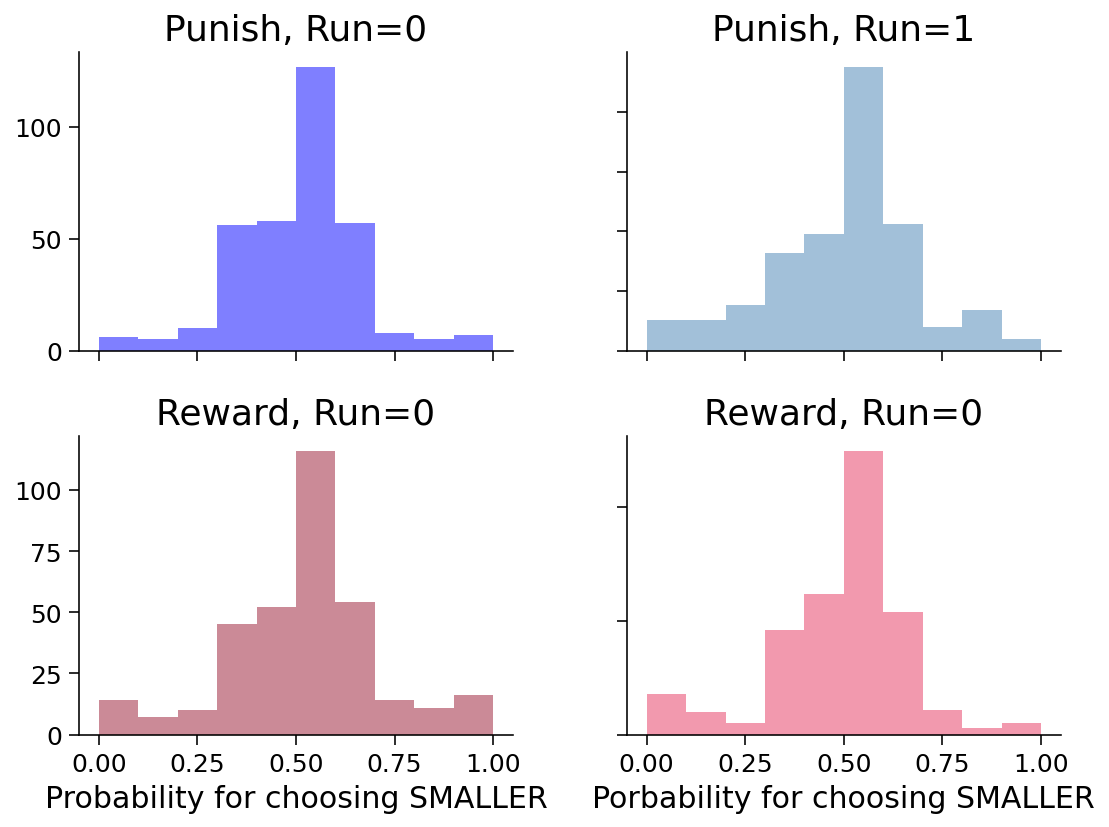

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

fig.suptitle('')
y =Gamblingbehavior.PROP_LARGER[(Gamblingbehavior.Run==0) & (Gamblingbehavior.ConditionName=='PUNISH')].dropna()
ax1.hist(y,bins=10, alpha=0.5, histtype='stepfilled', color='blue', edgecolor='none')
y =Gamblingbehavior.PROP_LARGER[(Gamblingbehavior.Run==1) & (Gamblingbehavior.ConditionName=='PUNISH')].dropna()
ax2.hist(y,bins=10, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')
y =Gamblingbehavior.PROP_LARGER[(Gamblingbehavior.Run==0) & (Gamblingbehavior.ConditionName=='REWARD')].dropna()
ax3.hist(y,bins=10, alpha=0.5, histtype='stepfilled', color='#991731', edgecolor='none')
y =Gamblingbehavior.PROP_LARGER[(Gamblingbehavior.Run==1) & (Gamblingbehavior.ConditionName=='REWARD')].dropna()
ax4.hist(y,bins=10, alpha=0.5, histtype='stepfilled', color='#E6355E', edgecolor='none')


ax1.set_title("Punish, Run=0")
ax2.set_title("Punish, Run=1")
ax3.set_title("Reward, Run=0")
ax4.set_title("Reward, Run=0")
ax3.set_xlabel("Probability for choosing SMALLER")
ax4.set_xlabel("Porbability for choosing SMALLER")

for ax in fig.get_axes():
    ax.label_outer()

> Ploting boxplots



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 576x432 with 0 Axes>

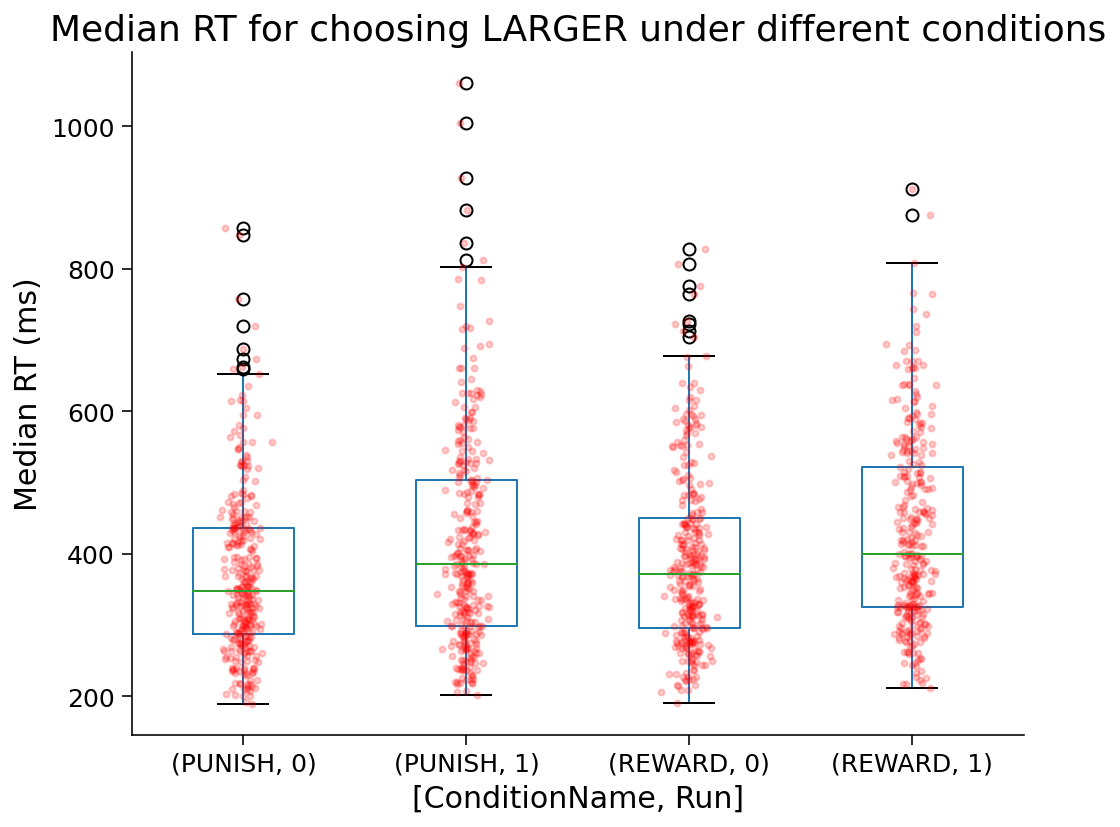

In [ ]:
P.figure()
axes = Gamblingbehavior.boxplot(column=['MEDIAN_RT_LARGER'], by=['ConditionName','Run'],grid=False)
# set the Y label & title
axes.set_ylabel("Median RT (ms)")
title_boxplot = 'Median RT for choosing LARGER under different conditions'
plt.title( title_boxplot )
plt.suptitle('')


for i in [0,1]:
    # select the RT based on conditions
    y = Gamblingbehavior.MEDIAN_RT_LARGER[(Gamblingbehavior.Run==i) & (Gamblingbehavior.ConditionName=='PUNISH')].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i+1, 0.04, size=len(y))
    P.plot(x, y, 'r.', alpha=0.2)

for i in [0,1]:
    y = Gamblingbehavior.MEDIAN_RT_LARGER[(Gamblingbehavior.Run==i) & (Gamblingbehavior.ConditionName=='REWARD')].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i+3, 0.04, size=len(y))
    P.plot(x, y, 'r.', alpha=0.2)


In [ ]:
P.figure()
axes = Gamblingbehavior.boxplot(column=['MEDIAN_RT_SMALLER'], by=['ConditionName','Run'],grid=False)
# set the Y label & title
axes.set_ylabel("Median RT (ms)")
title_boxplot = 'Median RT for choosing LARGER under different conditions'
plt.title( title_boxplot )
plt.suptitle('')


for i in [0,1]:
    # select the RT based on conditions
    y = Gamblingbehavior.MEDIAN_RT_SMALLER[(Gamblingbehavior.Run==i) & (Gamblingbehavior.ConditionName=='PUNISH')].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i+1, 0.04, size=len(y))
    P.plot(x, y, 'r.', alpha=0.2)

for i in [0,1]:
    y = Gamblingbehavior.MEDIAN_RT_SMALLER[(Gamblingbehavior.Run==i) & (Gamblingbehavior.ConditionName=='REWARD')].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i+3, 0.04, size=len(y))
    P.plot(x, y, 'r.', alpha=0.2)

NameError: ignored

In [ ]:
P.figure()
axes = Gamblingbehavior.boxplot(column=['PROP_LARGER'], by=['ConditionName','Run'],grid=False)
# set the Y label & title
axes.set_ylabel("Median RT (ms)")
title_boxplot = 'Median RT for choosing LARGER under different conditions'
plt.title( title_boxplot )
plt.suptitle('')


for i in [0,1]:
    # select the RT based on conditions
    y = Gamblingbehavior.PROP_LARGER[(Gamblingbehavior.Run==i) & (Gamblingbehavior.ConditionName=='PUNISH')].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i+1, 0.04, size=len(y))
    P.plot(x, y, 'r.', alpha=0.2)

for i in [0,1]:
    y = Gamblingbehavior.PROP_LARGER[(Gamblingbehavior.Run==i) & (Gamblingbehavior.ConditionName=='REWARD')].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i+3, 0.04, size=len(y))
    P.plot(x, y, 'r.', alpha=0.2)

NameError: ignored

## Task based analysis

**Question 1.**  Block/run difference? Will the reaction time and probability differ between two runs for each feedback condition.


It can be answered by 2-way repeated ANOVA, with *Independent varaibles:* run number (Run1,Run2); feedback (punish, reweard); *Dependet variables:* RT for larger; RT for smaller and the probability. 

In [ ]:
#dependent variable = MEDIAN_RT_LARGER
res = pg.rm_anova(dv='MEDIAN_RT_LARGER', within=['Run', 'ConditionName'], subject='Subject', data=df, detailed=True)
res

NameError: ignored

In [ ]:
#dependent variable = MEDIAN_RT_SMALLER
res = pg.rm_anova(dv='MEDIAN_RT_SMALLER', within=['Run', 'ConditionName'], subject='Subject', data=df, detailed=True)
res

NameError: ignored

In [ ]:
#dependent variable = PROP_LARGER
res = pg.rm_anova(dv='PROP_LARGER', within=['Run', 'ConditionName'], subject='Subject', data=df, detailed=True)
res

NameError: ignored

**Results:** The feedback and run influenced RT significantly.
Subjects tend to have longer RT during reward blocks, and during the second runs. There is no significnat interaction. 

<Figure size 576x432 with 0 Axes>

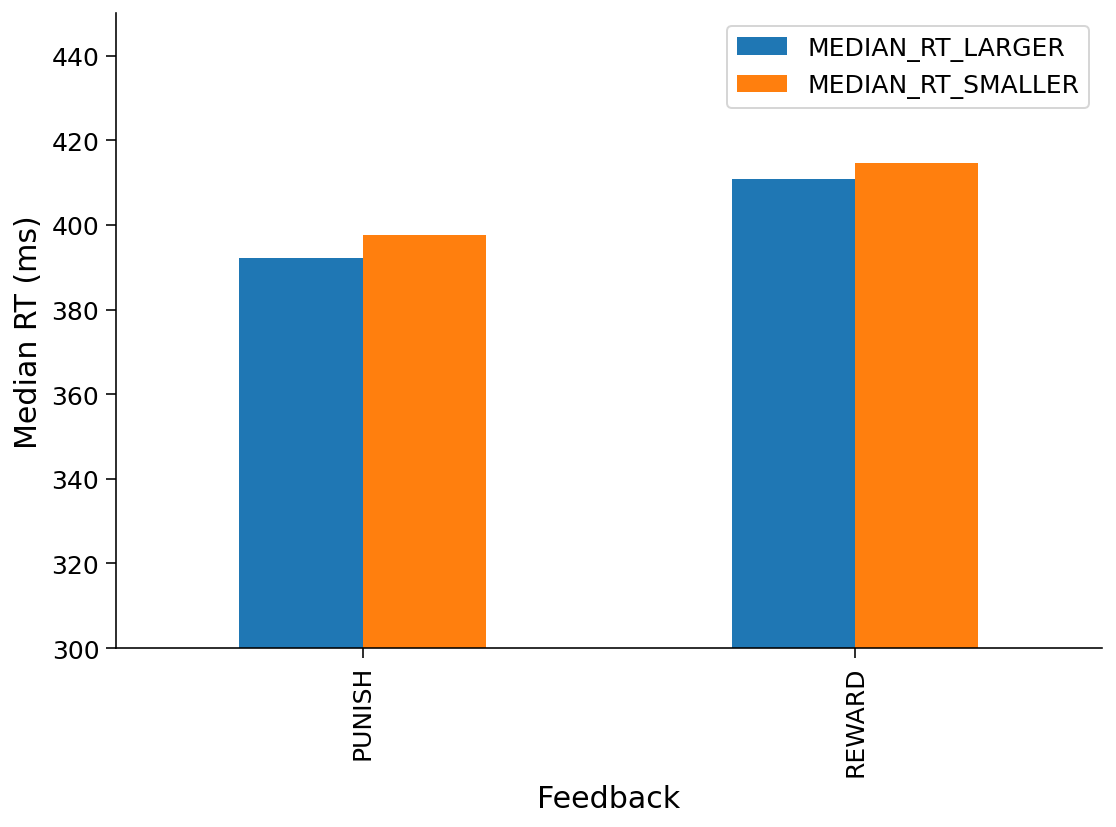

In [ ]:
P.figure()
df=Gamblingbehavior.groupby('ConditionName').mean()
df.plot(kind='bar', title='', y=["MEDIAN_RT_LARGER","MEDIAN_RT_SMALLER"],ylabel='Median RT (ms)',
         xlabel='Feedback', ylim=(300, 450))

<Figure size 576x432 with 0 Axes>

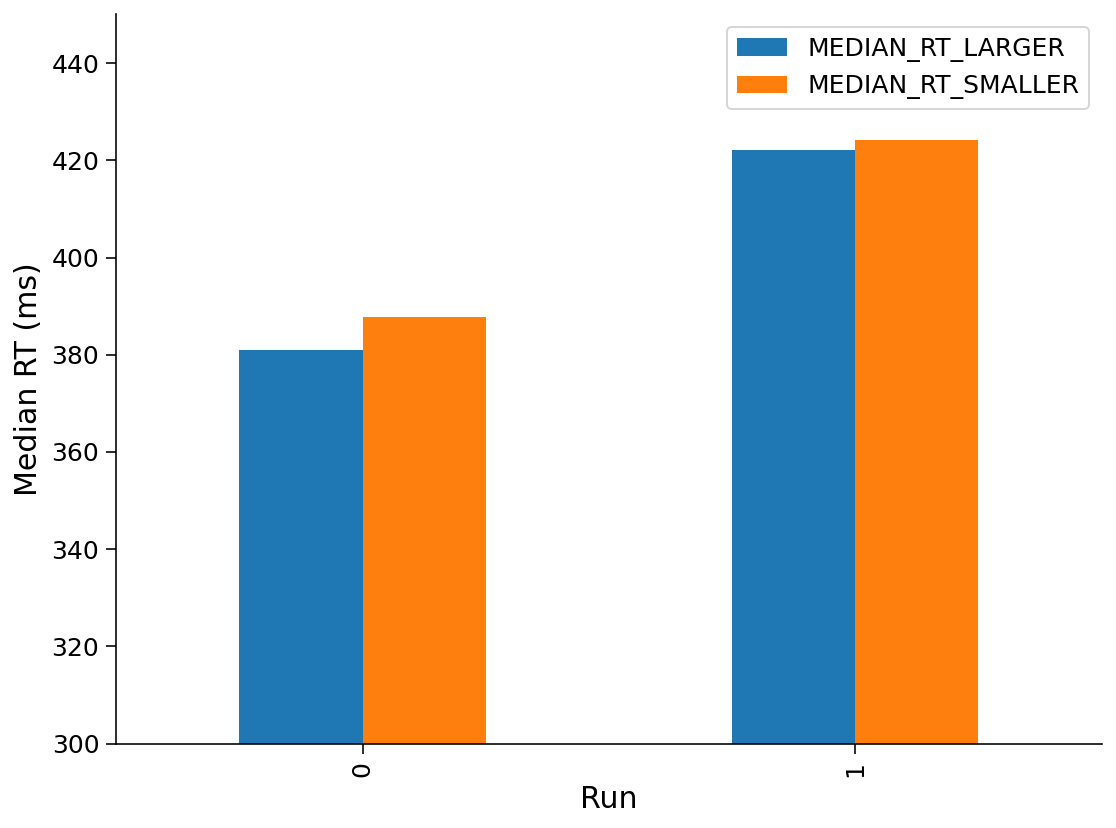

In [ ]:
P.figure()
df=Gamblingbehavior.groupby('Run').mean()
df.plot(kind='bar', title='', y=["MEDIAN_RT_LARGER","MEDIAN_RT_SMALLER"],ylabel='Median RT (ms)',
         xlabel='Run', ylim=(300, 450))

In [ ]:
y1 = Gamblingbehavior.PROP_LARGER[(Gamblingbehavior.Run==0)].dropna()
y2 = Gamblingbehavior.PROP_LARGER[(Gamblingbehavior.Run==1)].dropna()

print(y1)



0       0.687500
1       0.562500
4       0.312500
5       0.687500
8       0.562500
          ...   
1345    0.466667
1348    0.437500
1349    0.750000
1352    0.687500
1353    0.562500
Name: PROP_LARGER, Length: 678, dtype: float64
